In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import akshare as ak
from restool import *

plt.rcParams['figure.figsize']=[20,5]

In [2]:
stock_zh_index_spot_df = ak.stock_zh_index_spot()[['代码', '名称']].set_index('代码')

100%|██████████| 8/8 [00:01<00:00,  5.17it/s]


In [3]:
stock_zh_index_spot_df[stock_zh_index_spot_df['名称'] == '沪深300']

,名称
代码,
sh000300,沪深300
sz399300,沪深300


In [4]:
Ashare_index = ak.stock_zh_index_daily(symbol="sh000001").set_index('date')
HS300_index = ak.stock_zh_index_daily(symbol="sh000300").set_index('date')
chuangye_index = ak.stock_zh_index_daily(symbol="sz399006").set_index('date')

Ashare_index.index = pd.to_datetime(Ashare_index.index)
HS300_index.index = pd.to_datetime(HS300_index.index)
chuangye_index.index = pd.to_datetime(chuangye_index.index)

In [19]:
chuangye_index.index.year[0]

2010

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


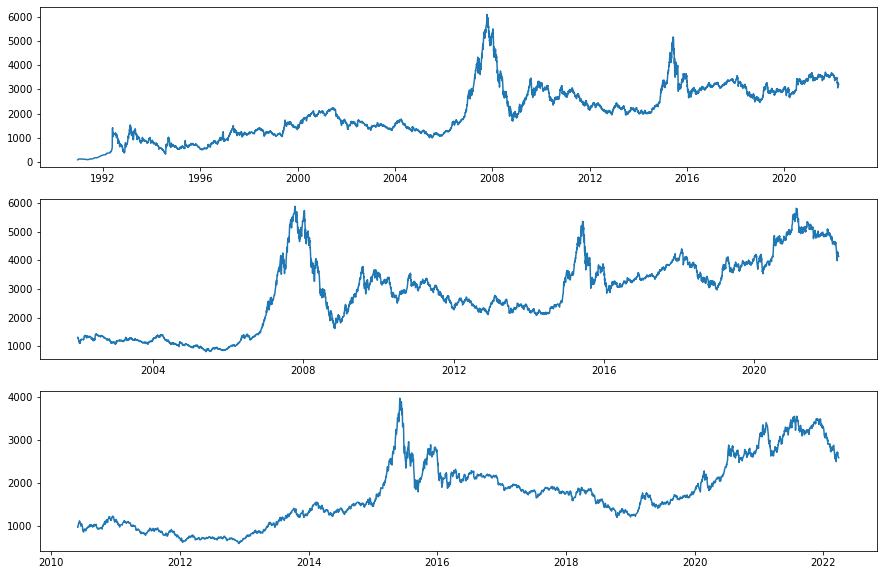

In [5]:
plt.rcParams['figure.figsize']=[15,10]
fig, axs = plt.subplots(3)
axs[0].plot(Ashare_index['close'])
axs[1].plot(HS300_index['close'])
axs[2].plot(chuangye_index['close'])

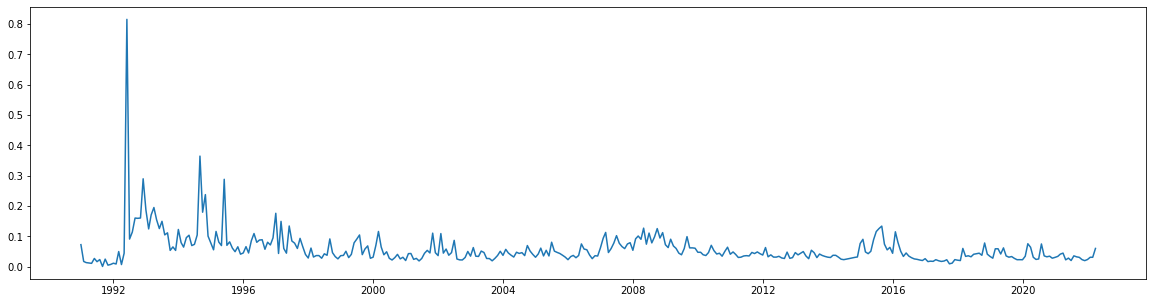

In [6]:
daily_return = Ashare_index['close'].pct_change().dropna()
monthly_annualized_volatility = daily_return.resample('M').std() * np.sqrt(12)
plt.rcParams['figure.figsize']=[20,5]
plt.plot(monthly_annualized_volatility)
# plt.title('Monthly Annualized vol - Black Monday and 2008 Financial Crisis highlighted')
# labs = mpatches.Patch(color='red',alpha=.5, label="Black Monday & '08 Crash")
# plt.legend(handles=[labs])

In [49]:
def volatility_rank(df, PLOT=True):

    ts = df['close'].pct_change().dropna()
    monthly_annualized_volatility = ts.resample('M').std() * np.sqrt(12)
    ranked = monthly_annualized_volatility.groupby(monthly_annualized_volatility.index.year).rank()
    final = ranked.groupby(ranked.index.month).mean()

    if PLOT:
        max_volatility_month = final[final == final.max()].index[0]
        min_volatility_month = final[final == final.min()].index[0]
        b_plot = plt.bar(x=final.index,height=final)
        b_plot[max_volatility_month-1].set_color('g')
        b_plot[min_volatility_month-1].set_color('r')
        for i,v in enumerate(round(final,2)):
            plt.text(i+.8,1,str(v), color='black', fontweight='bold')
        plt.axhline(final.mean(),ls='--',color='k',label=round(final.mean(),2))
        plt.title('Average Monthly Volatility Ranking since {}'.format(df.index.year[0]))

        plt.legend()
        plt.show()
    return final

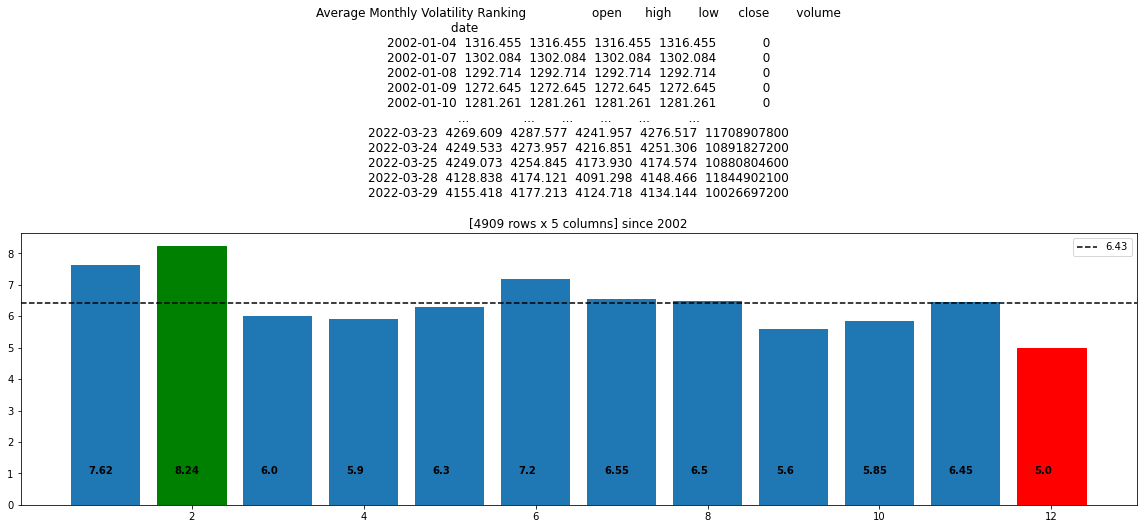

date
1     7.619048
2     8.238095
3     6.000000
4     5.900000
5     6.300000
6     7.200000
7     6.550000
8     6.500000
9     5.600000
10    5.850000
11    6.450000
12    5.000000
Name: close, dtype: float64

In [48]:
volatility_rank(HS300_index)

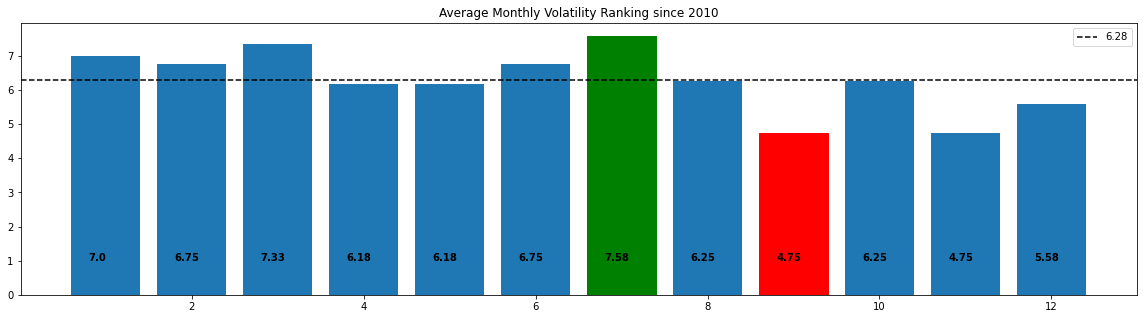

date
1     7.000000
2     6.750000
3     7.333333
4     6.181818
5     6.181818
6     6.750000
7     7.583333
8     6.250000
9     4.750000
10    6.250000
11    4.750000
12    5.583333
Name: close, dtype: float64

In [45]:
volatility_rank(chuangye_index)

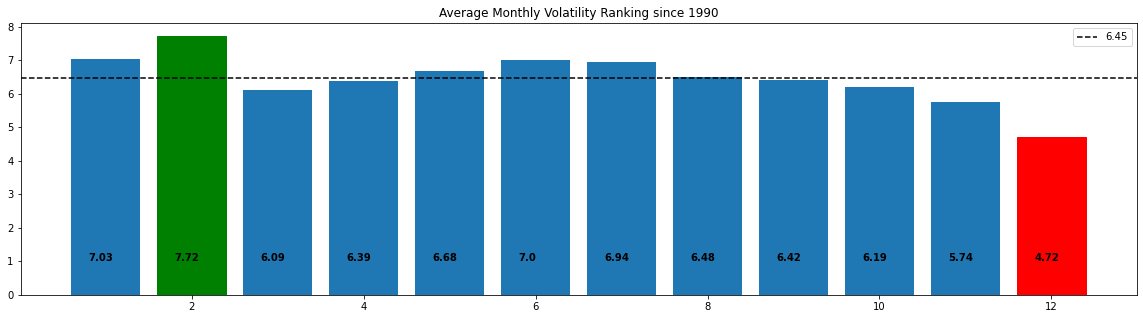

date
1     7.031250
2     7.718750
3     6.093750
4     6.387097
5     6.677419
6     7.000000
7     6.935484
8     6.483871
9     6.419355
10    6.193548
11    5.741935
12    4.718750
Name: close, dtype: float64

In [46]:
volatility_rank(Ashare_index)

In [40]:
fin = abs(final - final.mean())
print(fin.sort_values())
Oct_value = fin[10]
Dec_value = fin[12]
print('Extreme Dec value:', Dec_value)
print('Extreme Oct value:', Oct_value)

date
9     0.030746
8     0.033770
4     0.063004
5     0.227319
10    0.256552
3     0.356351
7     0.485383
6     0.549899
1     0.581149
11    0.708165
2     1.268649
12    1.731351
Name: close, dtype: float64
Extreme Dec value: 1.731350806451613
Extreme Oct value: 0.25655241935483897
